<a href="https://colab.research.google.com/github/atishayjain1x/Age-and-Gender-Classification/blob/main/age_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder="drive/My Drive/ezyzip.zip"
!unzip "/content/drive/My Drive/ezyzip.zip" -d "/content"

Archive:  /content/drive/My Drive/ezyzip.zip
replace /content/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
p="/content/UTKFace"
import os
files=os.listdir(p)

def newlabel(age):

    if 0<= age <= 2:
        return 0
    elif 3 <= age <= 8:
        return 1
    elif 9 <= age <= 14:
        return 2
    elif 15 <= age <= 20:
        return 3
    elif 21 <= age <= 27:
        return 4
    elif 28 <= age <= 35:
        return 5
    elif 36<=age<=45:
        return 6
    elif 46<=age<=59:
        return 7
    else:
        return 8
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical
import cv2
ages=[]
genders=[]
images=[]
random.shuffle(files)

for f in files:
  age=int(f.split('_')[0])
  gender=int(f.split('_')[1])
  path=p+'/'+f
  image=cv2.imread(path)
  image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  image=cv2.resize(image,(48,48))
  images.append(image)
  ages.append(newlabel(age))
  genders.append(gender)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

images_f=np.array(images)
genders=np.array(genders)
ages=np.array(ages)

i=0

p=[]
q=[]
labels=[]
while (i<len(ages)):
  l=to_categorical(ages[i],9)
  m=to_categorical(genders[i],2)
  p.append(l)
  q.append(m)
  i=i+1
p=np.array(p).astype(np.float32) 
q=np.array(q).astype(np.float32)

labels=[q,p]


In [ ]:
for i in range(2):
    imageset=images_f/255
    imageset=np.array(imageset).astype(np.float32)
    xtrain,xtest,ytrain,ytest=train_test_split(imageset,labels[i],test_size=0.25)
    aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

    inputs=Input((48, 48, 3))
    c1=Conv2D(32,kernel_size=3, activation="relu")(inputs)
    m1=MaxPooling2D(2,2)(c1)
    c2=Conv2D(64,kernel_size=3, activation="relu")(m1)
    m2=MaxPooling2D(2,2)(c2)
    m2=BatchNormalization()(m2)
    c3=Conv2D(128,kernel_size=3, activation="relu")(m2)
    m3=MaxPooling2D(2,2)(c3)
    c4=Conv2D(256,kernel_size=3, activation="relu")(m3)
    m4=MaxPooling2D(2,2)(c4)
    m4=BatchNormalization()(m4)

    f=(Flatten())(m4)
    de2=Dense(units=256,activation='relu')(f)        
    de3=Dense(units=64,activation='relu')(de2)
    d2=BatchNormalization()(de3)
    o1=Dense(2,activation="sigmoid",name='sex_out')(d2)
    o2=Dense(units=9,activation="softmax",name='age_out')(d2)
    out=[o1,o2]
    ls=["binary_crossentropy","categorical_crossentropy"]
    model = Model(inputs=[inputs], outputs=[out[i]])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model.compile(loss=ls[i], optimizer="Adam",metrics=["accuracy"])
    model.fit(aug.flow(xtrain,ytrain,batch_size=250),validation_data=(xtest,ytest),epochs=60,callbacks=[callback])
    if i==0:  
      model.save("gender_detect_model")
    else:
      model.save("age_detect_model")
    s=model.evaluate(xtest,ytest)
    print(s)  

Epoch 1/60
72/72 [==============================] - 14s 184ms/step - loss: 0.5467 - accuracy: 0.7282 - val_loss: 0.6653 - val_accuracy: 0.5240
Epoch 2/60
72/72 [==============================] - 13s 182ms/step - loss: 0.4306 - accuracy: 0.7980 - val_loss: 0.6119 - val_accuracy: 0.6575
Epoch 3/60
72/72 [==============================] - 13s 182ms/step - loss: 0.3874 - accuracy: 0.8215 - val_loss: 0.6625 - val_accuracy: 0.5473
Epoch 4/60
72/72 [==============================] - 13s 179ms/step - loss: 0.3586 - accuracy: 0.8405 - val_loss: 0.6577 - val_accuracy: 0.5569
Epoch 5/60
72/72 [==============================] - 13s 182ms/step - loss: 0.3446 - accuracy: 0.8431 - val_loss: 0.6137 - val_accuracy: 0.6420
Epoch 6/60
72/72 [==============================] - 14s 188ms/step - loss: 0.3263 - accuracy: 0.8532 - val_loss: 0.4086 - val_accuracy: 0.7984
Epoch 7/60
72/72 [==============================] - 13s 185ms/step - loss: 0.3172 - accuracy: 0.8554 - val_loss: 0.3498 - val_accuracy: 0.8382

In [ ]:

genderlabel=["Male","Female"]
agelabel=["0-2","3-8","9-14","15-20","21-27","28-35","36-45","46-59","60+"]
from tensorflow.keras.models import load_model
mod1=load_model("gender_detect_model")
mod2=load_model("age_detect_model")

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  


  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  image =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image=cv2.resize(img,(48,48))
  faces = image.astype(np.float32) / 255.0
  faces=img_to_array(faces)
  faces = np.expand_dims(faces, axis=0)
  ge=mod1.predict(faces)
  ag=mod2.predict(faces)
  ge =np.argmax(ge)
  ag=np.argmax(ag)
  ge=genderlabel[ge]
  ag=agelabel[ag]
  lab=ag+' '+ge
  cv2.putText(img,lab,(55,20),cv2.FONT_HERSHEY_SIMPLEX,0.4, (255,0,0),2)
  cv2.imwrite(filename,img)
  return filename

<IPython.core.display.Javascript object>

Saved to age_gender_image.jpg


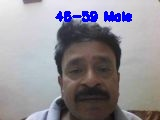

In [ ]:
filename = take_photo('age_gender_image.jpg')
print('Saved to {}'.format(filename))
display(Image(filename))